In [1]:
#準備#
#文章数が知りたい#
# mecab<mecabをかけるファイル>かけた後のファイル名　でコマンドプロンプトで実行
path='data/neko.txt.mecab'
List_of_sentence=[]

def len_sent():
    with open(path) as f:
        List=[]   
        List_of_dic=[]
        i=0
        for line in f:
        
            dic={"surface":"","base":"","pos":"","pos1":""}
            List=line.replace('\n','').replace('\t',',').split(",")#文章全体をdicに要素ごとに格納
            if List[0]!='EOS':
                dic["surface"]=List[0]
                dic["base"]=List[7]
                dic["pos"]=List[1]
                dic["pos1"]=List[2]
                if dic["pos1"]!='句点':
                    List_of_dic.append(dic)
                
                else:
                    i+=1
                    List_of_dic.append(dic)
                    #List_of_sentence.append(List_of_dic)
                    List_of_dic=[]
        return i            
        
                

sentencelendata=len_sent()
print(sentencelendata)


7486


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
path='data/neko.txt.mecab'
List_of_sentence=[]

def mecab_print(n):
    with open(path) as f:
        List=[]   
        List_of_dic=[]
        i=0
        for line in f:
            dic={"surface":"","base":"","pos":"","pos1":""}
            List=line.replace('\n','').replace('\t',',').split(",")
            if List[0]!='EOS':
                dic["surface"]=List[0]
                dic["base"]=List[7]
                dic["pos"]=List[1]
                dic["pos1"]=List[2]
                if dic["pos1"]!='句点':
                    List_of_dic.append(dic)
                
                else:
                    i+=1
                    List_of_dic.append(dic)
                    yield List_of_dic
                    List_of_dic=[]
                    
            if i==n:
                break
            
                
for sentencedata in mecab_print(1):#多いので省略
    print(sentencedata)
    
    


[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [3]:
verb_list=[]
for sentencedata in mecab_print(5):#多いので省略
    for dic in sentencedata:
        if dic["pos"]=="動詞":
            verb_list.append(dic["surface"])
print(verb_list)   


['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見']


## 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [4]:
verb_list=[]
for sentencedata in mecab_print(5):#多いので省略
    for dic in sentencedata:
        if dic["pos"]=="動詞":
            verb_list.append(dic["base"])
print(verb_list)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る']


## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
noun_brocks=[]
noun_memory1="" 
noun_memory2=""
flag=0
count=0
for sentencedata in mecab_print(30):#長いので省略
    for dic in sentencedata:
        if flag==0:
            if dic["pos"]=="名詞":
                noun_memory1=dic["surface"]
                flag=1
            else:
                flag=0
                noun_memory1=""
                
        elif flag==1:#noun_memory1が空じゃなければ
            if dic["surface"]=="の":
                flag=2
            else:
                flag=0
                noun_memory1=""
                
        elif flag==2:#noun_memory1の次に「の」が来たら
            if dic["pos"]=="名詞":
                noun_memory2=dic["surface"]
                noun_brocks.append(noun_memory1+"の"+noun_memory2)
                count+=1
                
                #メモリをリセット
                noun_memory1=""
                noun_memory2=""
                flag=0
            else:
                flag=0
                noun_memory1=""
                
    if count!=0:#文章中に1個以上「AのB」が存在したら
        print(noun_brocks)
        noun_brocks=[]
        count=0

            

['彼の掌']
['掌の上', '書生の顔']
['はずの顔']
['顔の真中']
['穴の中']
['書生の掌']
['何の事']
['肝心の母親']
['藁の上', '笹原の中']


## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [6]:
for sentencedata in mecab_print(10):
    lengcounter=0
    lengmemory=0
    final_noun_memory=[]#名詞のリスト
    noun_memory="" #保持される一文中の最高の連続名詞数
    for dic in sentencedata:
        if flag==0:
            if dic["pos"]=="名詞":
                noun_memory=dic["surface"]
                lengcounter+=1
                flag=1
                
        elif flag==1:#前の単語が名詞なら
            if dic["pos"]=="名詞":#また名詞が来たらnoun_memoryに足してく
                noun_memory=noun_memory+dic["surface"]
                lengcounter+=1
            else:#名詞じゃなかったらそれまでのfinalnounlistと長さを比較する
                flag=0
                if lengcounter > lengmemory:#
                    lengmemory=lengcounter
                    final_noun_memory=[]
                    final_noun_memory.append(noun_memory)
                
                elif lengcounter==lengmemory:
                    final_noun_memory.append(noun_memory)           
                noun_memory=""
                lengcounter=0
          
    print(final_noun_memory)
    

['一', '吾輩', '猫']
['名前']
['どこ', '見当']
['何', '所', 'ニャーニャー', 'いた事', '記憶']
['吾輩', 'ここ', '人間', 'もの']
['人間中', '一番獰悪']
['書生', 'の', '我々', '話']
['当時', '何', '考']
['彼', '掌', 'スー', '時', '感じ']
['掌', '上', '書生', '顔', 'の', '人間', 'もの', '始']


In [7]:
#文章全体で最長一致#
final_noun_memory_of_all=[] #文章全体の最長単語が入ったリスト
masterlengmemory=0 #文章全体で最長一致の長さを記憶する
for sentencedata in mecab_print(7486):
    lengcounter=0
    lengmemory=0
    final_noun_memory=[]#名詞のリスト
    noun_memory="" #保持される一文中の最高の連続名詞数
    for dic in sentencedata:
        if flag==0:
            if dic["pos"]=="名詞":
                noun_memory=dic["surface"]
                lengcounter+=1
                flag=1
                
        elif flag==1:#前の単語が名詞なら
            if dic["pos"]=="名詞":#また名詞が来たらnoun_memoryに足してく
                noun_memory=noun_memory+dic["surface"]
                lengcounter+=1
            else:#名詞じゃなかったらそれまでの# finalnounlistと長さを比較する
                flag=0
                if lengcounter > lengmemory:#
                    lengmemory=lengcounter
                    final_noun_memory=[]
                    final_noun_memory.append(noun_memory)
                
                elif lengcounter==lengmemory:
                    final_noun_memory.append(noun_memory)           
                noun_memory=""
                lengcounter=0
                
    if lengmemory>masterlengmemory:#上のことを文章全体でやる
        masterlengmemory=lengmemory
        final_noun_memory_of_all=[]
        final_noun_memory_of_all=final_noun_memory
    elif lengmemory==masterlengmemory:
        final_noun_memory_of_all+=final_noun_memory
            
                
print(final_noun_memory_of_all)
print(masterlengmemory)
    

["manyaslip'twixtthecupandthelip", '明治三十八年何月何日戸締り']
10


## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
#35#
import collections  

List_for_sentense=[]
for sentencedata in mecab_print(7486):
    for dic in sentencedata:
        List_for_sentense.append(dic["surface"]) 
        
c=collections.Counter(List_for_sentense)  #リストの出現回数ごとに新たな辞書を生成
dictionary=c.most_common()

for i in range(10):
    print(dictionary[i])

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)


## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [9]:
#countsには頻度,valueには単語が入る#
import matplotlib.pyplot as plt

values,counts=zip(*dictionary) #要素と出現回数を分けたリストを個別生成

print(list(values[:10]))

plt.bar(list(values[:10]),counts[:10],tick_label=list(values[:10]))
plt.show()

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']


<Figure size 640x480 with 1 Axes>

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

('の', 397)
('は', 284)
('、', 265)
('に', 251)
('を', 240)
('て', 236)
('。', 219)
('と', 210)
('が', 185)
('で', 175)
['の', 'は', '、', 'に', 'を', 'て', '。', 'と', 'が', 'で']


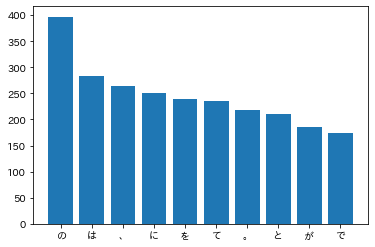

In [10]:
List_for_sentense=[]
plt.rcParams['font.family'] = 'IPAPGothic'

for sentencedata in mecab_print(7486):
    
    cat_check=0
    List_for_sentense_temp=[]
    
    for dic in sentencedata:
        List_for_sentense_temp.append(dic["surface"])
        if "猫" in dic.values():
            cat_check=1
    if cat_check==1:
        List_for_sentense+=List_for_sentense_temp
                        
c=collections.Counter(List_for_sentense) #リストの出現回数ごとに新たな辞書を生成
c["猫"]=0#猫は消す
dictionary=c.most_common()#出現回数ごとに並べ替え


for i in range(10):
    print(dictionary[i])
    
values,counts=zip(*dictionary) #要素と出現回数を分けたリストを個別生成

print(list(values[:10]))
plt.rcParams["font.family"]="IPAexGothic"
plt.bar(list(values[:10]),counts[:10],tick_label=list(values[:10]))
plt.show()

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

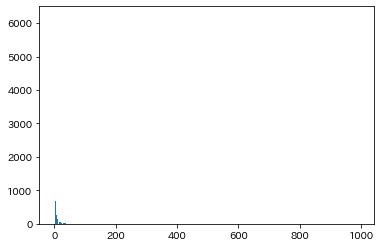

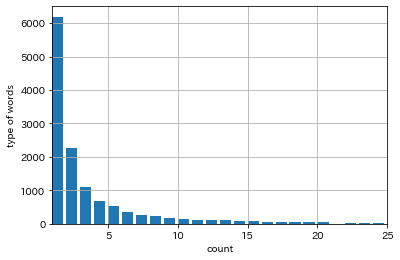

In [11]:
import collections  
#counts_of_countには,values_of_count
List_for_sentense=[]
for sentencedata in mecab_print(7486):
    for dic in sentencedata:
        List_for_sentense.append(dic["surface"]) 
        
c=collections.Counter(List_for_sentense)  #リストの出現回数ごとに新たな辞書を生成
dictionary=c.most_common()
values,counts=zip(*dictionary)

countList=collections.Counter(counts)#出現頻度と単語の種類のリストを作る#
dictionary_of_count=countList.most_common()
values_of_count,type_of_words=zip(*dictionary_of_count)


plt.bar(list(values_of_count[:100]),list(type_of_words[:100]))#見にくい#
plt.show()

plt.bar(list(values_of_count[:25]),list(type_of_words[:25]),align="edge")
plt.xlim(1,25)
plt.xlabel("count")
plt.ylabel("type of words")
plt.grid(True)
plt.show()

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

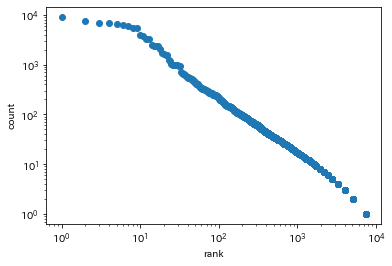

In [12]:
#dictionary ('の', 9194), ('。', 7486)みたいに入ってる
List_for_zips_rank=[]
List_for_zips_count=[]
#print(counts)
for i,data in enumerate(counts):
    List_for_zips_count.append(data)
    if i>0 and counts[i-1]==data:
        List_for_zips_rank.append(List_for_zips_rank[-1])
    else:
        List_for_zips_rank.append(i+1)

        
plt.scatter(List_for_zips_rank,List_for_zips_count)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank')
plt.ylabel('count')
plt.show()
#print(List_for_zips_count)
#print(List_for_zips_rank)
    